# Pandas

`Pandas` là một thư viện cơ bản dùng để phân tích dữ liệu. `Pandas` cho phép người dùng đọc, ghi dữ liệu từ file và cung cấp những chức năng để việc phân tích dữ liệu được dễ dàng.

Bạn có thể xem cheatshet (bảng tóm tắt) các hàm của Pandas ở đây [LINK](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

Trong tài liệu này chúng ta sẽ tìm hiểu những nội dung sau:

- Series và DataFrame: 2 cấu trúc dữ liệu trên Pandas
- Đọc dữ liệu: đọc vào một đối tượng DataFrame
- Khám phá dữ liệu thông qua việc: hiểu dữ liệu, sắp xếp, tóm tắt, lọc dữ liệu, gom nhóm
- Thao tác trên dữ liệu: xử lý các trường hợp đặc biệt như giá trị bị thiếu, giá trị ngoại lệ
- Lưu dữ liệu sau khi đã xử lý

Trước khi sử dụng chúng ta cần phải tải thư viện `Pandas` và `Numpy`

In [2]:
import pandas as pd
import numpy as np

## SERIES VÀ DATAFRAME

Có hai cấu trúc dữ liệu tronng Pandas đó là: `Series` and `DataFrame`.

`Series` giống như list trong Python, là cấu trúc mảng một chiều dùng để chứa dữ liệu. `Series` sử dụng nhãn (label) hoặc chỉ mục (index) để truy cập các phần tử.

In [3]:
x = pd.Series([34, 23, -5, 0])
print(x)

0    34
1    23
2    -5
3     0
dtype: int64


Bạn có thể sử dụng phím TAB để xem danh sách các hàm của một đối tượng Series. Ví dụ, bạn gõ "x." sau đó nhấn `TAB`

Một `DataFrame` giống như một bảng trong Excel với các hàng và các cột.

Bạn có thể tạo một DataFrame bằng cách sử dụng Dictionary trong Python:

In [4]:
data = {
    "name": ["Mary", "David", "Jack", "John", "Robin"],
    "state": ["VIC", "NSW", "VIC", "SA", "QLD"],
    "birthyear": [1980, 1992, 2000, 1980, 1995],
}
df = pd.DataFrame(data)
df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992
2,Jack,VIC,2000
3,John,SA,1980
4,Robin,QLD,1995


Hoặc có thể thêm vào cuối của `DataFrame` như cách dưới đây:

In [5]:
df = pd.DataFrame(columns=["name", "state", "birthyear"])
df.loc[len(df)] = ["Mary", "VIC", 1980]
df.loc[len(df)] = ["David", "NSW", 1992]

df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992


## ĐỌC DỮ LIỆU

Đọc bộ dữ liệu `grades.csv`

Bộ dữ liệu này chứa kết quả đánh giá điểm của sinh viên (Pass hoặc Fail) cho một lớp học gồm 40 sinh viên.

Dữ liệu có các trường dữ liệu như sau:

- `Student ID`: mã sinh viên


- `Gender`: giới tính


- `Project Phase 1`: điểm project giai đoạn 1, tối đa 20 điểm.


- `Project Phase 2`: điểm project giai đoạn 2, tối đa 30 điểm.


- `Mid-Semester Test`: điểm giữa kỳ, tối đa 100 điểm


- `Final Exam`: điểm cuối kỳ, tối đa 100 điểm.


- `Grade`: Xếp loại sinh viên đậu (PA) hay rớt (NN)

Trước tiên, cần đọc dữ liệu.

In [6]:
grades = pd.read_csv("data/grades.csv", header=0)

## KHÁM PHÁ DỮ LIỆU

### Xem dữ liệu

Có rất nhiêu cách tiếp cận để xem dữ liệu

 Hàm `head()` dùng để hiển thị 5 dòng dữ liệu đầu tiên.

In [7]:
grades.head()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
0,101,Male,18.25,15.5,94,61.0,PA
1,102,Female,17.75,30.0,79,62.0,PA
2,103,Male,0.00,0.0,78,15.0,NN
3,104,Male,20.00,25.0,69,65.0,PA
4,105,Male,18.75,30.0,96,51.0,PA


Bạn cũng có thể hiển thị số dòng mà bạn muốn. Ví dụ, hiển thị 2 dòng

In [8]:
grades.head(2)

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
0,101,Male,18.25,15.5,94,61.0,PA
1,102,Female,17.75,30.0,79,62.0,PA


Hàm `tail()` hiển thị 5 dòng cuối cùng

In [9]:
grades.tail()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
35,136,Male,18.50,22.0,26,68.0,PA
36,137,Female,20.00,26.0,89,63.0,PA
37,138,Male,18.75,30.0,59,52.0,PA
38,139,Male,19.00,30.0,70,NaN,PA
39,140,Male,20.00,29.0,84,77.0,PA


Hàm `sample()` lựa chọn ngẫu nhiên các dòng của toàn bộ dữ liệu

In [10]:
grades.sample(5, random_state=99)

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
25,126,Female,20.00,22.5,83,56.0,PA
36,137,Female,20.00,26.0,89,63.0,PA
29,130,Male,19.50,13.0,62,39.0,NN
22,123,Male,19.75,30.0,74,61.0,PA
28,129,Male,20.00,30.0,64,86.0,PA


### Hiểu dữ liệu

Hàm `shape` tính số lượng dòng và số lượng cột của dữ liệu. Bạn có thể sử dụng `grades.shape[0]` và `grades.shape[1]` để lấy số dòng và số cột một cách riêng lẻ

In [11]:
grades.shape

(40, 7)

Hàm `info()` mô tả thông tin về các cột và kiểu dữ liệu từng cột

In [12]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         40 non-null     int64  
 1   Gender             37 non-null     object 
 2   Project Phase 1    40 non-null     float64
 3   Project Phase 2    37 non-null     float64
 4   Mid-Semester Test  40 non-null     int64  
 5   Final Exam         36 non-null     float64
 6   Grade              40 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ KB


Hàm `describe()` cung cấp các thông tin thống kê mô tả cho từng cột. Lưu ý rằng: hàm `describe()` này không bao gồm các giá trị *null*.

In [13]:
grades.describe()

,Student ID,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
count,40.000000,40.000000,37.000000,40.000000,36.000000
mean,120.500000,16.987500,23.750000,72.100000,56.055556
std,11.690452,5.964626,7.509716,19.664885,20.520296
min,101.000000,0.000000,0.000000,26.000000,6.000000
25%,110.750000,17.687500,20.000000,59.750000,45.500000
50%,120.500000,19.500000,25.500000,76.000000,60.000000
75%,130.250000,20.000000,30.000000,86.000000,71.750000
max,140.000000,20.000000,35.000000,100.000000,91.000000


Trong ví dụ trên, nếu để ý bạn sẽ thấy rằng 2 cột *Gender* và *Grade* không được hiển thị. Lý do là vì những cột này mang thuộc tính phân loại (categorical data). Nếu bạn muốn hiển thị cả những cột này khi gọi hàm `describe()` thì cần thêm tham số `include = all`.

In [14]:
grades.describe(include="all")

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
count,40.000000,37,40.000000,37.000000,40.000000,36.000000,40
unique,NaN,4,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,PA
freq,NaN,22,NaN,NaN,NaN,NaN,29
mean,120.500000,NaN,16.987500,23.750000,72.100000,56.055556,NaN
std,11.690452,NaN,5.964626,7.509716,19.664885,20.520296,NaN
min,101.000000,NaN,0.000000,0.000000,26.000000,6.000000,NaN
25%,110.750000,NaN,17.687500,20.000000,59.750000,45.500000,NaN
50%,120.500000,NaN,19.500000,25.500000,76.000000,60.000000,NaN
75%,130.250000,NaN,20.000000,30.000000,86.000000,71.750000,NaN


Dưới đây là một số hàm thường dùng để tìm hiểu dữ liệu:
- `count()` đếm số lượng phần tử.
- `value_counts()` đếm tần suất xuất hiện của giá trị.
- `nunique()` đếm số lượng giá trị
- `mean()` tính trung bình
- `std()` tính độ lệch chuẩn
- `max()` tính giá trị lớn nhất
- `min()` tính giá trị nhỏ nhất

In [15]:
grades.count()

Student ID           40
Gender               37
Project Phase 1      40
Project Phase 2      37
Mid-Semester Test    40
Final Exam           36
Grade                40
dtype: int64

In [16]:
grades["Gender"].value_counts()

Gender
Male      22
Female    13
M          1
F          1
Name: count, dtype: int64

In [17]:
grades["Gender"].nunique()

4

In [18]:
grades["Final Exam"].mean()

56.05555555555556

In [19]:
grades["Mid-Semester Test"].std()

19.664884751955512

In [20]:
grades["Project Phase 2"].max()

35.0

In [21]:
grades["Project Phase 1"].min()

0.0

### Sắp Xếp

Bạn có thể sắp xếp dữ liệu của một cột nào đó bằng cách sử dụng hàm `sort_values()`. Chúng ta sẽ sắp xếp dữ liệu cột Final Exam theo thứ tự giảm dần.

Nếu bạn muốn sau khi sắp xếp, dữ liệu của bạn thay đổi theo, bạn cần thêm tham số `inplace` và gán với giá trị là `True`. Đây là **nguyên tắc cơ bản** trong pandas. Nếu bạn không thiết lập `inplace = True` bạn cần phải gán kết quả cho một biến khác để lưu giữ giá trị thay đổi.

Một ưu điểm khác của Pandas đó là bạn có thể gọi một chuỗi các hàm liên tiếp nhau, ví dụ dưới đây gọi hàm `sort_values()` và `head()`

In [22]:
grades.sort_values(by="Final Exam", ascending=False).head()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
27,128,Female,20.0,30.00,84,91.0,PA
28,129,Male,20.0,30.00,64,86.0,PA
26,127,Female,20.0,35.00,84,83.0,PA
14,115,Male,19.5,26.00,100,79.0,PA
13,114,Male,20.0,22.75,85,78.0,PA


---

### Chọn Cột

Trong trường hợp, dữ liệu của bạn có quá nhiều cột, bạn chỉ muốn chọn một số cột để hiển thị. Ví dụ, chọn 2 cột *Gender* và *Grade*.

In [23]:
# notice the double brackets
grades[["Gender", "Grade"]].head()

,Gender,Grade
0,Male,PA
1,Female,PA
2,Male,NN
3,Male,PA
4,Male,PA


Bạn có thể lấy dữ liệu của một cột, ví dụ: lấy dữ liệu của cột *Gender* và gán váo biến **gender_series**, khi đó biến này sẽ có kiểu dữ liệu là `series`


In [24]:
# notice the single bracket
gender_series = grades["Gender"]

In [25]:
type(gender_series)

pandas.core.series.Series

In [26]:
gender_series.head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: Gender, dtype: object

Hoặc bạn có thể dùng dấu '.' như sau:

In [27]:
grades.Gender.head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: Gender, dtype: object

### Lọc Dữ Liệu

Bạn có thể trích dữ liệu dựa vào một số các tiêu chí cụ thể. Giả sử, bạn muốn liệt kê các sinh viên không đậu trong lớp.

In [28]:
grades[grades["Grade"] == "NN"]

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
2,103,Male,0.00,0.0,78,15.0,NN
8,109,M,18.00,23.0,50,33.0,NN
12,113,Female,0.00,NaN,67,NaN,NN
16,117,NaN,15.75,10.0,81,34.0,NN
17,118,Male,12.50,10.0,30,22.0,NN
18,119,Male,17.50,20.0,61,31.0,NN
21,122,Female,20.00,23.0,37,25.0,NN
29,130,Male,19.50,13.0,62,39.0,NN
30,131,Male,0.00,NaN,60,NaN,NN
31,132,Female,17.50,20.0,42,47.0,NN


Hoặc làm như sau:

In [29]:
grades[grades.Grade == "NN"]

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
2,103,Male,0.00,0.0,78,15.0,NN
8,109,M,18.00,23.0,50,33.0,NN
12,113,Female,0.00,NaN,67,NaN,NN
16,117,NaN,15.75,10.0,81,34.0,NN
17,118,Male,12.50,10.0,30,22.0,NN
18,119,Male,17.50,20.0,61,31.0,NN
21,122,Female,20.00,23.0,37,25.0,NN
29,130,Male,19.50,13.0,62,39.0,NN
30,131,Male,0.00,NaN,60,NaN,NN
31,132,Female,17.50,20.0,42,47.0,NN


Bạn cung có thể lọc dựa vào nhiều tiêu chí. Ví dụ, liệt kê các sinh viên không đậu và có điểm thi cuối kỳ (Final Exam) lớn hơn 35. Đồng thời kết quả hiển thị chỉ lấy 4 cột *(Student ID, Final Exam, Grade)*

In [30]:
grades.loc[
    (grades["Grade"] == "NN") & (grades["Final Exam"] > 35),
    ["Student ID", "Final Exam", "Grade"],
]

,Student ID,Final Exam,Grade
29,130,39.0,NN
31,132,47.0,NN


Ngoài ra, sử dụng hàm `iloc()` bạn có thể truy cập và trích xuất dữ liệu như một mảng hai chiều. Hàm `iloc()` lấy dữ liệu dựa vào chỉ số của DataFrame (bạn có thể truyền vào chỉ số âm giống như list trên Python)

In [31]:
grades.iloc[10:16, -2:]

,Final Exam,Grade
10,52.0,PA
11,NaN,PA
12,NaN,NN
13,78.0,PA
14,79.0,PA
15,52.0,PA


### Gom Nhóm

Pandas cho phép gom dữ liệu thành các nhóm sau đó thực hiện tính toán trên từng nhóm. Ví dụ, gom dữ liệu dựa vào thuộc tính `Grade`, sau đó đếm số lượng dữ liệu mỗi nhóm

In [32]:
grades.groupby(["Grade"]).count()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
Grade,,,,,,
NN,11,10,11,9,11,9
PA,29,27,29,28,29,27


Kết quả của câu lệnh trên trả về kiểu DataFrame, bạn có thể tự kiểm tra bằng cách sử dụng hàm `type()`.

Bạn có thể sử dụng hàm `size()` để lấy kết quả trả về kiểu Series

In [33]:
grades.groupby(["Grade"]).size()

Grade
NN    11
PA    29
dtype: int64

Ví dụ dưới đây, gom nhóm theo giới tính, sau đó với mỗi nhóm lại gom theo nhóm con là `Grade`

In [34]:
grades.groupby(["Gender", "Grade"]).count()

Student ID  Project Phase 1  Project Phase 2  Mid-Semester Test  \
Gender Grade                                                                    
F      PA              1                1                1                  1   
Female NN              3                3                2                  3   
       PA             10               10                9                 10   
M      NN              1                1                1                  1   
Male   NN              6                6                5                  6   
       PA             16               16               16                 16   

              Final Exam  
Gender Grade              
F      PA              1  
Female NN              2  
       PA              9  
M      NN              1  
Male   NN              5  
       PA             15

Để ý rằng, kết quả gom nhóm có những dòng dữ liệu mang ý nghĩa giống nhau, ví dụ F và Female, M bà Male. Chúng ta sẽ xử lý vấn đề này trong phần Thao Tác Trên Dữ Liệu.


Sử dụng hàm `reset_index()` để chuyển kết quả sau khi gom nhóm ở trên thành 1 DataFrame

In [35]:
grades.groupby(["Gender", "Grade"]).count().reset_index()

,Gender,Grade,Student ID,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
0,F,PA,1,1,1,1,1
1,Female,NN,3,3,2,3,2
2,Female,PA,10,10,9,10,9
3,M,NN,1,1,1,1,1
4,Male,NN,6,6,5,6,5
5,Male,PA,16,16,16,16,15


## THAO TÁC TRÊN DỮ LIỆU

### Xử Lý Dữ Liệu Bị Thiếu

Xử lý dữ liệu bị thiếu là một công việc tốn nhiều thời gian nhưng rất quan trọng. Trước hết, chúng ta cần phải xác định được dữ liệu còn thiếu sau đó cần tìm hiểu xem vì sau chúng bị thiếu?

Có hai phương án để xử lý các dữ liệu bị thiếu:
1. Xóa bỏ các dòng, cột chứa chúng.
2. Thay thế các giá trị thiếu bằng những giá trị khác.

Các giá trị bị thiếu trong Python được ký hiệu là `na` hoặc `null`. Ngoài ra, trong `Numpy` ký hiệu giá trị còn thiếu là `NaN` (Not a Number).

Trước tiên, chúng ta thử đếm những giá trị bị thiếu trong ví dụ trên.

In [36]:
grades.isna().sum()

Student ID           0
Gender               3
Project Phase 1      0
Project Phase 2      3
Mid-Semester Test    0
Final Exam           4
Grade                0
dtype: int64

Hàm `dropna()` dùng để xoá tất cả các dòng chứa ít nhất một giá trị bị thiếu.

In [37]:
grades_no_na = grades.dropna()
grades_no_na.shape

(33, 7)

Thử kiểm tra số lượng giá trị bị thiếu mỗi cột sau khi sử dụng hàm `dropna()`

In [38]:
grades_no_na.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      0
Mid-Semester Test    0
Final Exam           0
Grade                0
dtype: int64

Tương tự, chúng ta thử kiểm tra cột `Gender`.

In [39]:
grades["Gender"].value_counts()

Gender
Male      22
Female    13
M          1
F          1
Name: count, dtype: int64

In [40]:
grades["Gender"].isna().sum()

3

Như vậy, cột `Gender` có 3 dữ liệu bị thiếu. Sử dụng hàm `fillna()` để thay các giá trị còn thiếu bằng giá trị  "Unknown"

In [41]:
grades["Gender"].fillna("Unknown", inplace=True)

# this also works:
# # grades[['Gender']] = grades[['Gender']].fillna('Unknown')

grades["Gender"].value_counts()

Gender
Male       22
Female     13
Unknown     3
M           1
F           1
Name: count, dtype: int64

Kiểm tra lại các giá trị bị thiếu.

In [42]:
grades.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      3
Mid-Semester Test    0
Final Exam           4
Grade                0
dtype: int64

Để ý rằng, một số cột điểm như *Project Phase 2* và *Final Exam* có chứa dữ liệu bị thiếu. Tuy nhiên, điều này có nghĩa là do sinh viên vắng mặt trong lúc làm bài; vì vậy, ta sẽ chuyển các giá trị bị thiếu này thành 0 điểm.

In [43]:
grades = grades.fillna(0)

Kiểm tra lại một lần nữa

In [44]:
grades.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      0
Mid-Semester Test    0
Final Exam           0
Grade                0
dtype: int64

### Xử Lý Khi Số Lượng Giá Trị Phân Biệt Bất Thường

Đôi khi, chúng ta sẽ gặp trường hợp số lượng các giá trị phân biệt của các trường dữ liệu (cột) mang giá trị khác biệt (bất thường). Những trường hợp này cần phải có xử lý phù hợp.

Xét ví dụ trên, trước hết thử kiểm tra số lượng dữ liệu phân biệt của các trường (cột) của dữ liệu, bằng cách sử dụng hàm `nunique()`

In [45]:
grades.nunique()

Student ID           40
Gender                5
Project Phase 1      15
Project Phase 2      19
Mid-Semester Test    34
Final Exam           31
Grade                 2
dtype: int64

Trước hết, cần để ý rằng tất cả các giá trị trong cột `Student ID` là khác nhau vì mỗi sinh viên có mã khác nhau. Vì vậy, ta sẽ bỏ cột này đi vì nó không có nghĩa khi thực hiện thống kê.

In [46]:
grades.drop(columns=["Student ID"], inplace=True)

Tiếp theo, cần để ý rằng cột `Gender` có đện giá trị phân biệt. Sử dụng hàm `value_counts()` thử ta liệt kê các giá trị này:

In [47]:
grades["Gender"].value_counts()

Gender
Male       22
Female     13
Unknown     3
M           1
F           1
Name: count, dtype: int64

Kết quả trên cho ta thấy lý do là vì giới tính nam mang 2 giá trị phân biệt là (Male và M), tương tự giới tính nữ cũng mang hai giá trị phân biệt là (Female và F). Chúng ta sẽ chuẩn hóa các giá trị này bằng cách sử dụng hàm `replace()` như dưới đây:

In [48]:
grades.replace(["M", "male"], "Male", inplace=True)

In [49]:
grades.replace(["F", "female"], "Female", inplace=True)

Kiểm tra lại kết quả.

In [50]:
grades["Gender"].value_counts()

Gender
Male       23
Female     14
Unknown     3
Name: count, dtype: int64

### Phát Hiện Ngoại Lệ

Ngoại lệ (outliers) là các giá trị rất khác biệt so với các giá trị còn lại trong bộ dữ liệu. Giá trị ngoại lệ thường nằm rất so với tâm của dữ liệu. Một trong những cách có thể dùng để xác định ngoại lệ (outliers) đó là vẽ đồ thị hộp (boxplot). Pandas cho phép người dùng có thể vẽ đồ thị hộp từ cột dữ liệu của DataFrame

Để vẽ, trước tiên cần tại thư viện `matplotlib.pyplot`

In [51]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")  # chọn style là "ggplot" để hiển thị dễ nhìn hơn

ModuleNotFoundError: No module named 'matplotlib'

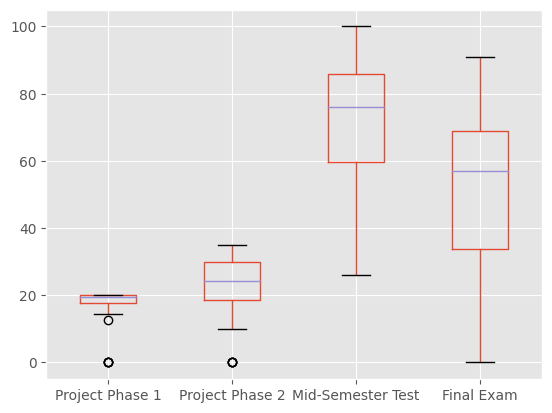

In [ ]:
grades.boxplot(
    column=["Project Phase 1", "Project Phase 2", "Mid-Semester Test", "Final Exam"]
)

Một đồ thị khác có thể dùng để phát hiện ngoại lệ đó là **histogram**. Bạn cũng có thể vẽ histogram từ Pandas như sau:

In [ ]:
grades.hist(
    column=["Project Phase 1", "Project Phase 2", "Mid-Semester Test", "Final Exam"]
)

## LƯU DỮ LIỆU

Pandas cho phép lưu đối tượng DataFrame thành nhiều loại định dạng như: csv, excel, json, html, sql... 

Trước hết, chúng ta đổi thử tên cột của đối tượng `grades` sử dụng hàm `rename()`, sau đó lưu xuống file `grades-saved.csv`

In [ ]:
grades.rename(
    columns={
        "Project Phase 1": "Project 1",
        "Project Phase 2": "Project 2",
        "Mid-Semester Test": "Test",
    },
    inplace=True,
)
grades.head(10)

,Gender,Project 1,Project 2,Test,Final Exam,Grade
0,Male,18.25,15.5,94,61.0,PA
1,Female,17.75,30.0,79,62.0,PA
2,Male,0.00,0.0,78,15.0,NN
3,Male,20.00,25.0,69,65.0,PA
4,Male,18.75,30.0,96,51.0,PA
5,Male,17.00,23.5,80,59.0,PA
6,Unknown,19.75,19.5,82,76.0,PA
7,Male,20.00,28.0,95,44.0,PA
8,Male,18.00,23.0,50,33.0,NN
9,Female,20.00,30.0,92,63.0,PA


In [ ]:
grades.to_csv("grades-saved.csv", index=False)

Bây giờ, bạn hãy thử mở file `grades-saved.csv` bằng excel và kiểm tra.

## TÓM TẮT

Trong tài liệu này, hướng dẫn bạn các thao tác căn bản khi sử dụng thư viện `Pandas` để xử lý dữ liệu. Thông qua bài hướng dẫn bạn cần nắm một số ý chính như:
- Biết hai kiểu dữ liệu chính trong Pandas là `Series` và `DataFrame`
- Đọc và lưu dữ liệu dạng file có định dạng .csv
- Khám phá dữ liệu thông qua các thao tác như: hiển thị một số dòng dữ liệu, xem các thông tin thống kê của các cột, xem một một tập dữ liệu con, gom nhóm, sắp xếp dữ liệu.
- Xử lý dữ liệu trong một số trường hợp như: dữ liệu bị thiếu, có bất thường trong số lượng các giá trị phân biệt của trường dữ liệu, và dữ liệu có ngoại lệ.

---

## THAM KHẢO

- [10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) (official)
- [W3School Pandas](https://www.w3schools.com/python/pandas/default.asp)

---
